# Analysis of Business, Sanitation and Crime Data
**CS109A Final Project**<br>
**Predicting Food Inspection Outcomes in Chicago**<br>
Calvin J Chiew, Angelo Kastroulis, Tim Hagmann<br>

# Original Analysis and Reports
In an effort to reduce the public’s exposure to foodborne illness the [City of Chicago](https://github.com/Chicago) partnered with Allstate’s Quantitative Research & Analytics department to develop built an algorithm to [predict likely health code violations](http://chicago.github.io/food-inspections-evaluation/) for restaurants based on publicly available data. They turned this into an open source project, freely available on [github](https://github.com/Chicago/food-inspections-evaluation), so other cities could implement this model.  

## File Layout

The following directory structure is used:

DIRECTORY           | DESCRIPTION
--------------------|----------------------
`.`                 | Project files such as README
`./data/`           | Data files created by scripts in `./CODE/`, or static
`./reports/`        | Reports and other output are located in 


## Preparation

In [1]:
# Clear namespace
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

Import libraries

In [122]:
# Data manipulation
import numpy as np
import pandas as pd

# Ploting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Data

Data used is stored in the ``./data`` directory. [Chicago’s Open Data Portal](http://data.cityofchicago.org). The data consists of 3 dataframes over the years from 2001 to 2016 about different businesses, crimerate and sanitation status in chicago. 

```
Business Licenses
Crime
Sanitation Complaints
```

The data sources are joined (in SQLesque manner) on appropriate composite keys. These keys include Inspection ID, Business License, and Geography expressed as a Latitude / Longitude combination among others. 

## Functions (necessary for the following calculations)

In [123]:
#--------  Scatter Plot
# A function that visualizes the data
# Input: 
#      x (variable on the x-axis)
#      y (variable on the y_axis)
#      df (panda data frame)
#      group (grouping variable, i.e., variable to plot)
#      col (vector of colors)
#      alpha (alpha value for colors)
#      size (size of the dots)
#      title (title of the plot)
#      marker (shape of the marker, default to 'o')
#      add_line (add a line plot)
#      linewidth (thinkness of the added line)
#      figsize (size of the figure)

def scatter_plot(x, y, df, group, col, alpha, size, title, marker='o', add_line=False, linewidth=1, figsize=(15, 10)):
    
    # Define plot
    fig = plt.figure(figsize=figsize)
    ax = plt.axes()

    # Extract unique categories
    cat = df[group].unique()

    # Loop trough categories
    for i in range(0, len(cat)) :
            ax.scatter(df[x][df[group] == cat[i]].values,
                       df[y][df[group] == cat[i]].values,
                       c=col[i], alpha=alpha, edgecolors="None", s=size,
                       label=cat[i],
                       marker=marker)
    # Add line plot
    if add_line:
            for i in range(0, len(cat)) :
                ax.plot(df[x][df[group] == cat[i]].values,
                           df[y][df[group] == cat[i]].values,
                           c=col[i], alpha=alpha, linewidth=linewidth)

    # Add legend, grid etc.
    ax.legend(loc=0, scatterpoints = 1) # Legend with just one dot
    ax.set_xlabel(x); ax.set_ylabel(y)
    ax.set_title(title)
    plt.grid()

In [124]:
#--------  Bar Plot
# A function to create a barplot
# Input: 
#      df (panda data frame)
#      var_name (name of the variable)
#      alpha (alpha value [0, 1])
#      title (title of the function)
#      color (color of the barplot)
#      edgecolor (cor of the outer barplotlines)
#      figsize (size of the figure)

def bar_plot(df, var_name, color='darkblue', alpha=0.6, title='', edgecolor='white', figsize=(18, 6)):
    
    ## Analyse crime types
    df['count'] = 1
    group = df.groupby(var_name)
    group = group.sum()
    group = group.sort_values('count', ascending=False)
    group = group['count']

    # Plot
    plt = group.plot(kind='bar', figsize=figsize, color=color, alpha=alpha, edgecolor=edgecolor, title=title)
    plt.grid()

# Analysis I: Business Licenses

## 1: Importing Data

In [125]:
# load csv file
df_business = pd.read_csv('data/Business_Licenses_-_Current_Active.csv')

## 2: Data Cleaning

In [126]:
# Transform column headers to lower case
df_business.columns = map(str.lower, df_business.columns)

# Replace whitespace in headers
df_business.columns = [x.strip().replace(' ', '_') for x in df_business.columns]

# Format to datetime string
df_business['license_term_start_date'] =  pd.to_datetime(df_business['license_term_start_date'], format='%m/%d/%Y')
df_business['license_term_expiration_date'] =  pd.to_datetime(df_business['license_term_expiration_date'], format='%m/%d/%Y')
df_business['license_approved_for_issuance'] =  pd.to_datetime(df_business['license_approved_for_issuance'], format='%m/%d/%Y')
df_business['date_issued'] =  pd.to_datetime(df_business['date_issued'], format='%m/%d/%Y')
df_business['application_created_date'] =  pd.to_datetime(df_business['application_created_date'], format='%m/%d/%Y')

# Filter
df_business = df_business[~((df_business['application_type'] == 'C_CAPA') | (df_business['application_type'] == 'C_SBA'))]

# Exclude NA's
df_business = df_business[~pd.isnull(df_business['license_term_start_date'])]
df_business = df_business[~pd.isnull(df_business['license_term_expiration_date'])]


## 3. Data Exploration

In [127]:
print "Shape of the data: ", df_business.shape
print "Available data:\n", df_business.columns
# View first few rows
df_business.head()

Shape of the data:  (63524, 34)
Available data:
Index([u'﻿id', u'license_id', u'account_number', u'site_number', u'legal_name',
       u'doing_business_as_name', u'address', u'city', u'state', u'zip_code',
       u'ward', u'precinct', u'ward_precinct', u'police_district',
       u'license_code', u'license_description', u'business_activity_id',
       u'business_activity', u'license_number', u'application_type',
       u'application_created_date', u'application_requirements_complete',
       u'payment_date', u'conditional_approval', u'license_term_start_date',
       u'license_term_expiration_date', u'license_approved_for_issuance',
       u'date_issued', u'license_status', u'license_status_change_date',
       u'ssa', u'latitude', u'longitude', u'location'],
      dtype='object')


,﻿id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,license_term_start_date,license_term_expiration_date,license_approved_for_issuance,date_issued,license_status,license_status_change_date,ssa,latitude,longitude,location
0,1620668-20160516,2455262,295026,1,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,558 W ROOSEVELT RD,CHICAGO,IL,60607,...,2016-05-16,2018-05-15,2016-05-18,2016-08-30,AAI,NaN,NaN,41.867339,-87.641590,"(41.86733856638269, -87.64159005699716)"
1,2488345-20160830,2488345,409564,1,"BURKS HEATING AND COOLING SOLUTIONS, LLC","BURKS HEATING AND COOLING SOLUTIONS, LLC",5722 S WOOD ST 1ST,CHICAGO,IL,60636,...,2016-08-30,2018-09-15,2016-08-30,2016-08-30,AAI,NaN,NaN,41.789617,-87.669472,"(41.78961679000226, -87.66947199630827)"
2,2279620-20160830,2279620,305598,17,"PREFER VALET PARKING SERVICE, INC.","PREFER VALET PARKING SERVICES, INC.",2812-2840 W 26TH ST GROUND,CHICAGO,IL,60623,...,2016-08-30,2018-03-15,2016-08-30,2016-08-30,AAI,NaN,25.0,41.844792,-87.695742,"(41.84479183618235, -87.69574196647987)"
3,2354707-20160916,2482568,393149,1,ANGELINE R. MC CARTHY,ANGELINE R. MC CARTHY,17707 S HARLEM ST 1,TINLEY PARK,IL,60477,...,2016-09-16,2018-09-15,NaT,2016-08-30,AAI,NaN,NaN,NaN,NaN,NaN
4,1677226-20151116,2426071,300195,1,"CORNERSTONE CAFE', INC.",CORNERSTONE CAFE,2753 N WESTERN AVE,CHICAGO,IL,60647,...,2015-11-16,2017-11-15,2015-11-09,2015-11-10,AAI,NaN,NaN,41.931968,-87.687741,"(41.93196806631448, -87.6877412495)"


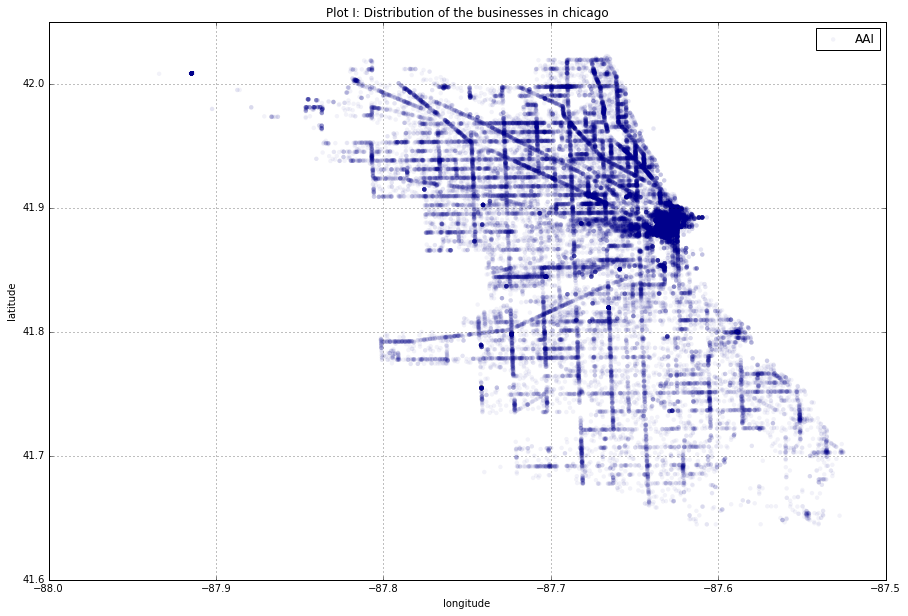

In [133]:
# Plot the data
col = ["darkblue", "darkred", "black"]
scatter_plot(x='longitude', y='latitude', df=df_business, group='license_status',
             col=col, alpha=0.05, size=20, marker='o', figsize=(15, 10),
             title="Plot I: Distribution of the businesses in chicago")

The above plot shows the distribution of business in Chicago. The plot shows a strong cluster in the downtown area as well as some distinct pattern for the major roads. 

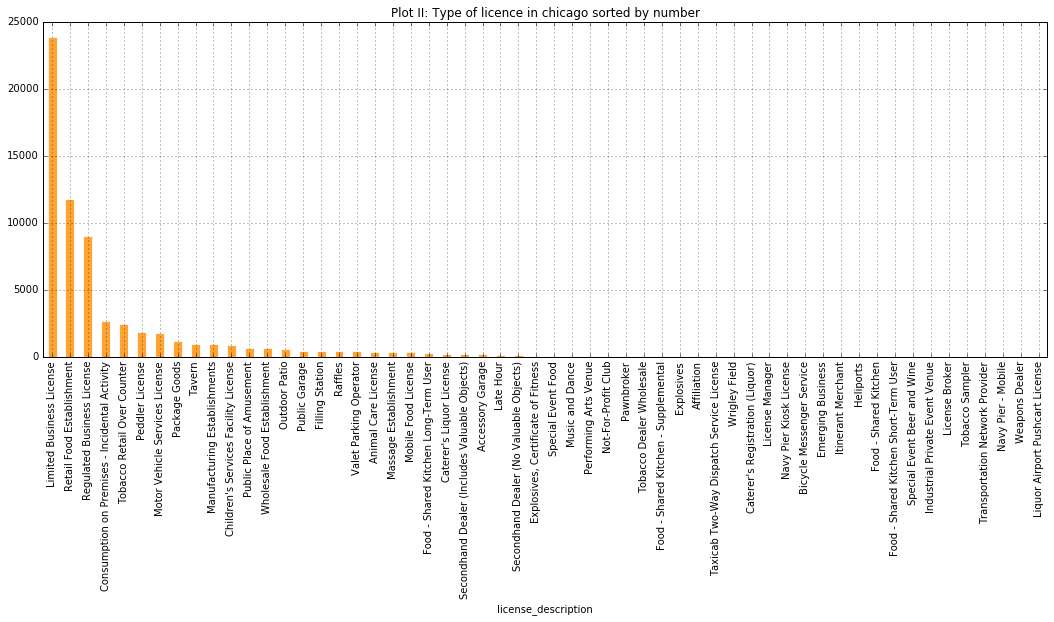

In [91]:
bar_plot(df=df_business, var_name='license_description', color='darkorange', alpha=0.8,
         title='Plot II: Type of licence in chicago sorted by number', edgecolor='white', figsize=(18, 6))

The highes amount of licences are distributed for limited business licences. This is followes by retail food establisments. The lowest amount of licences are for aiport liqour stores.

# Analysis II: Crime data

## 1: Importing Data

In [135]:
# load csv file
df_crimes = pd.read_csv('data/Crimes_-_2001_to_present.csv')

## 2: Data Cleaning

In [136]:
# Transform column headers to lower case
df_crimes.columns = map(str.lower, df_crimes.columns)

# Replace whitespace in headers
df_crimes.columns = [x.strip().replace(' ', '_') for x in df_crimes.columns]

Because of its size we're currently only looking at the crime data of 2015.

In [137]:
df_crimes_2015 = df_crimes[df_crimes['year'] == 2015]
df_crimes_2015.head()

# Exclude NA's
df_crimes_2015 = df_crimes_2015[~pd.isnull(df_crimes_2015['latitude'])]


## 3. Data Exploration

In [139]:
print "Shape of the data: ", df_crimes_2015.shape
print "Available data:\n", df_crimes_2015.columns
# View first few rows
df_crimes_2015.head()

Shape of the data:  (259817, 22)
Available data:
Index([u'﻿id', u'case_number', u'date', u'block', u'iucr', u'primary_type',
       u'description', u'location_description', u'arrest', u'domestic',
       u'beat', u'district', u'ward', u'community_area', u'fbi_code',
       u'x_coordinate', u'y_coordinate', u'year', u'updated_on', u'latitude',
       u'longitude', u'location'],
      dtype='object')


,﻿id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
1665762,9911261,HY100213,01/01/2015 03:02:00 AM,045XX W WELLINGTON AVE,0453,BATTERY,AGGRAVATED PO: OTHER DANG WEAP,STREET,True,True,...,31.0,20.0,04B,1145740.0,1919563.0,2015,02/04/2016 06:33:39 AM,41.935275,-87.739813,"(41.935274834, -87.739813321)"
1665852,9911589,HY100738,01/01/2015 12:30:00 AM,020XX W MELROSE ST,0880,THEFT,PURSE-SNATCHING,APARTMENT,False,False,...,32.0,5.0,06,1162168.0,1921577.0,2015,02/04/2016 06:33:39 AM,41.940473,-87.679383,"(41.94047341, -87.67938308)"
1668072,10336943,HY528149,12/05/2015 08:00:00 PM,025XX W ADDISON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESTAURANT,True,False,...,47.0,5.0,11,1159059.0,1923833.0,2015,02/04/2016 06:53:43 AM,41.946729,-87.690748,"(41.946728528, -87.690747572)"
1668690,10402279,HZ138747,12/16/2015 12:01:00 AM,006XX W FULTON ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,42.0,28.0,06,1172070.0,1902098.0,2015,04/15/2016 03:49:27 PM,41.886809,-87.643566,"(41.886809001, -87.643565821)"
1668691,10402352,HZ138755,12/09/2015 08:00:00 AM,031XX N BROADWAY,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,COMMERCIAL / BUSINESS OFFICE,False,False,...,44.0,6.0,11,1171708.0,1920869.0,2015,04/15/2016 03:49:27 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"


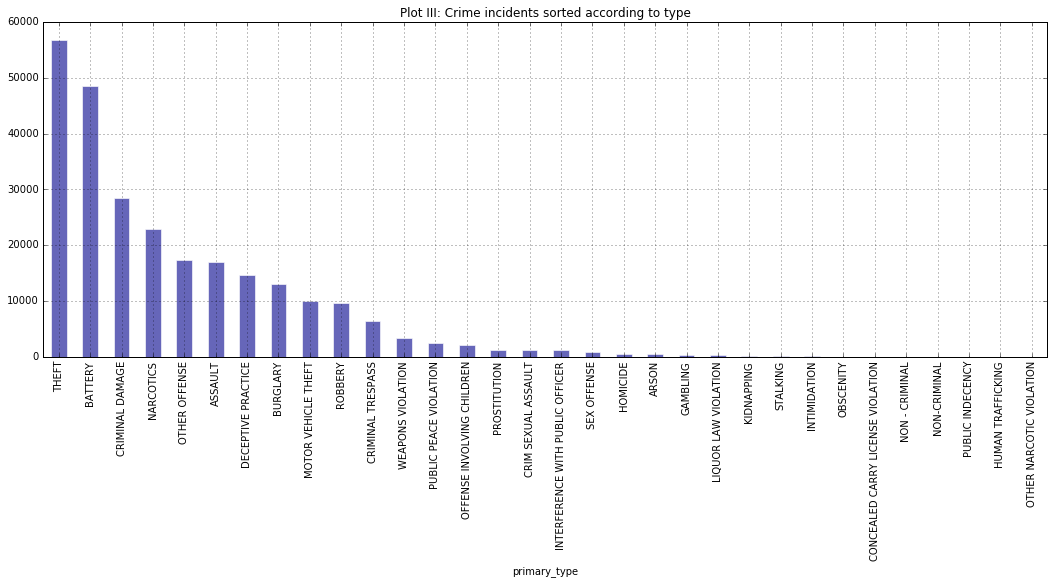

In [148]:
bar_plot(df=df_crimes_2015, var_name='primary_type', color='darkblue', alpha=0.6,
         title='Plot III: Crime incidents sorted according to type', edgecolor='white', figsize=(18, 6))

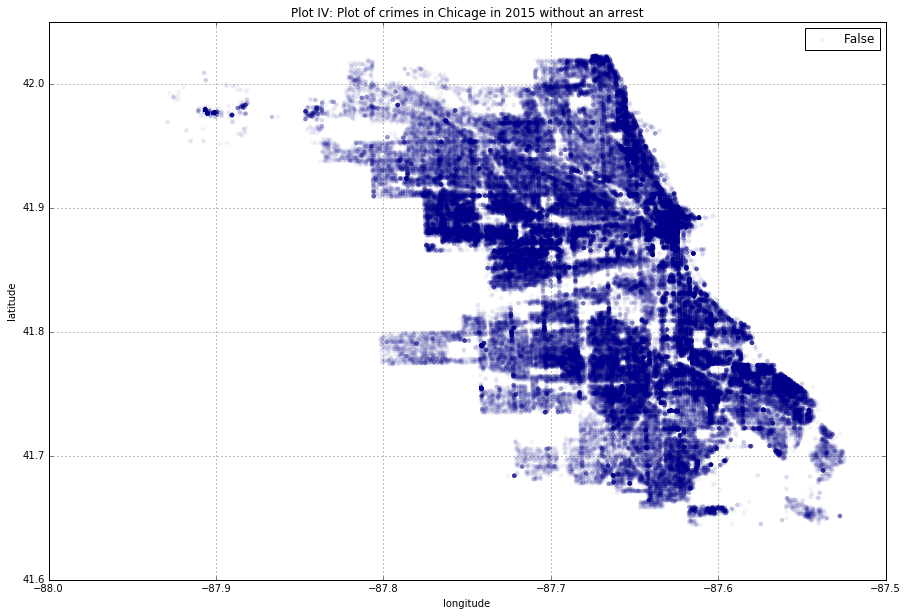

In [149]:
# Plot the data
col = ["darkblue", "darkred"]
scatter_plot(x='longitude', y='latitude', df=df_crimes_2015[df_crimes_2015['arrest'] == False], group='arrest',
             col=col, alpha=0.05, size=20, marker='o',
             title="Plot IV: Plot of crimes in Chicage in 2015 without an arrest")


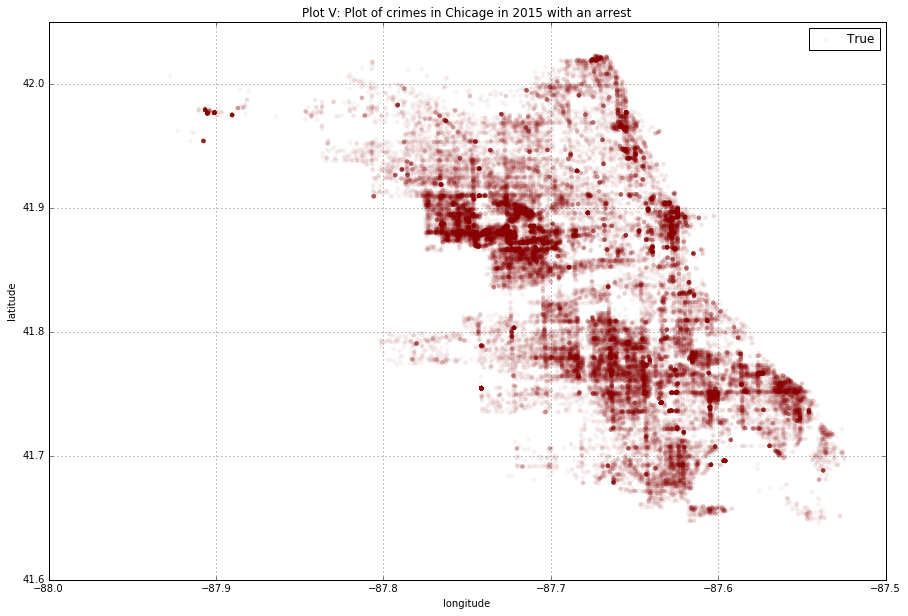

In [150]:
# Plot the data
col = ["darkred", "darkblue"]
scatter_plot(x='longitude', y='latitude', df=df_crimes_2015[df_crimes_2015['arrest'] == True], group='arrest',
             col=col, alpha=0.05, size=20, marker='o',
             title="Plot V: Plot of crimes in Chicage in 2015 with an arrest")


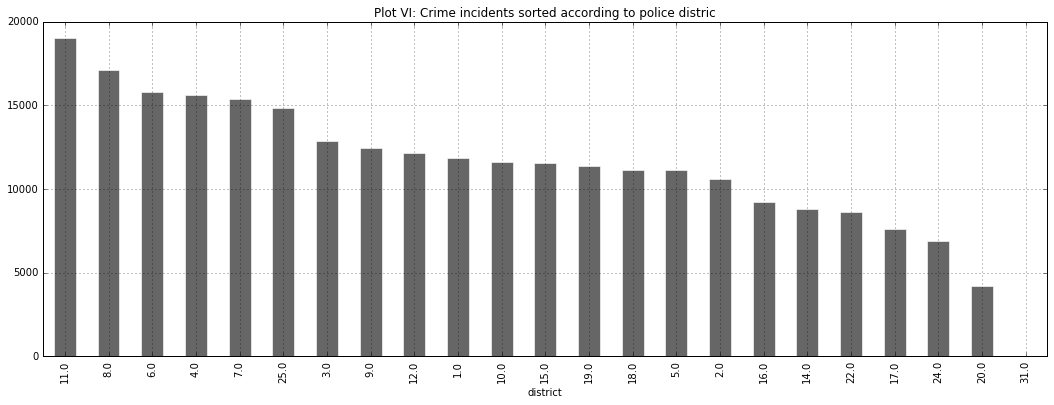

In [165]:
bar_plot(df=df_crimes_2015, var_name='district', color='black', alpha=0.6,
         title='Plot VI: Crime incidents sorted according to police distric', edgecolor='white', figsize=(18, 6))

Most crimes in absolute numbers appear to be happening in district 11, followed by district 8. The fewest amount of criminal incidents was is district 31. 

# Analysis III: Saniation Code Complaints

## 1: Importing Data

In [158]:
# load csv file
df_sanitation = pd.read_csv('data/311_Service_Requests_-_Sanitation_Code_Complaints.csv')

## 2: Data Cleaning

In [159]:
# Remove first row
df_sanitation = df_sanitation[1:len(df_sanitation)]

# Transform column headers to lower case
df_sanitation.columns = map(str.lower, df_sanitation.columns)

# Replace whitespace in headers
df_sanitation.columns = [x.strip().replace(' ', '_') for x in df_sanitation.columns]

# Format to datetime string
df_sanitation['creation_date'] =  pd.to_datetime(df_sanitation['creation_date'], format='%m/%d/%Y')
df_sanitation['completion_date'] =  pd.to_datetime(df_sanitation['completion_date'], format='%m/%d/%Y')

# Exclude NA's
df_sanitation = df_sanitation[~pd.isnull(df_sanitation['latitude'])]

## 3. Data Exploration

In [160]:
print "Shape of the data: ", df_sanitation.shape
print "Available data:\n", df_sanitation.columns

# View first few rows
df_sanitation.head()

Shape of the data:  (112597, 16)
Available data:
Index([u'creation_date', u'status', u'completion_date',
       u'service_request_number', u'type_of_service_request',
       u'what_is_the_nature_of_this_code_violation?', u'street_address',
       u'zip_code', u'x_coordinate', u'y_coordinate', u'ward',
       u'police_district', u'community_area', u'latitude', u'longitude',
       u'location'],
      dtype='object')


,creation_date,status,completion_date,service_request_number,type_of_service_request,what_is_the_nature_of_this_code_violation?,street_address,zip_code,x_coordinate,y_coordinate,ward,police_district,community_area,latitude,longitude,location
1,2011-01-01,Completed,2011-01-03,11-00001271,Sanitation Code Violation,Garbage in alley,3731 N KIMBALL AVE,60618.0,1.153055e+06,1.924737e+06,35.0,17.0,16.0,41.949330,-87.712791,"(41.949330379708314, -87.71279114200225)"
2,2011-01-01,Completed,2011-01-03,11-00001278,Sanitation Code Violation,Garbage in yard,3036 N SAWYER AVE,60618.0,1.154187e+06,1.920017e+06,35.0,14.0,21.0,41.936356,-87.708757,"(41.93635566035826, -87.70875735748406)"
3,2011-01-01,Completed,2011-01-03,11-00001696,Sanitation Code Violation,Construction Site Cleanliness/Fence,600 N CLARK ST,60654.0,1.175435e+06,1.904173e+06,42.0,18.0,8.0,41.892427,-87.631146,"(41.892427342273194, -87.6311463966443)"
4,2011-01-01,Completed,2011-01-03,11-00002161,Sanitation Code Violation,Garbage in alley,10047 S FOREST AVE,60628.0,1.180021e+06,1.838415e+06,9.0,5.0,49.0,41.711877,-87.616318,"(41.711877328148155, -87.61631763072438)"
5,2011-01-01,Completed,2011-01-03,11-00002373,Sanitation Code Violation,Garbage in yard,10648 S AVENUE B,60617.0,1.204784e+06,1.834964e+06,10.0,4.0,52.0,41.701807,-87.525750,"(41.70180714214017, -87.52574964355905)"


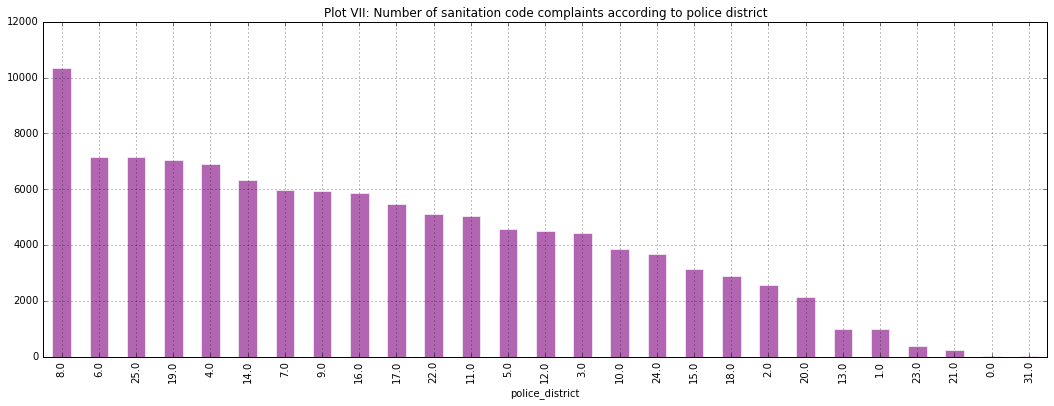

In [166]:
bar_plot(df=df_sanitation, var_name='police_district', color='purple', alpha=0.6,
         title='Plot VII: Number of sanitation code complaints according to police district', edgecolor='white', figsize=(18, 6))

It appears that most complaints are happening in district 8 while district 11 is stuck in the middle. However, we have to be careful in interpreting absolut numbers.

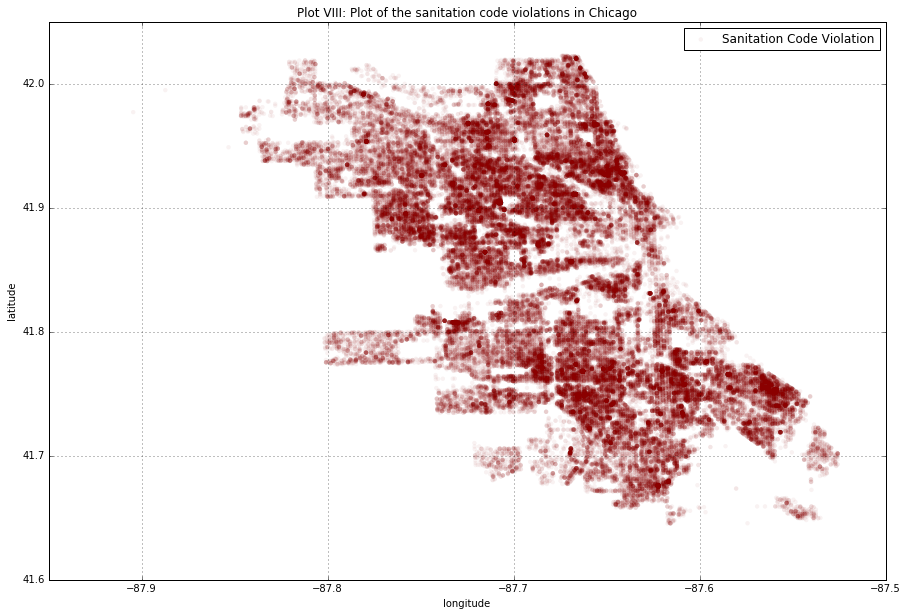

In [167]:
# Plot the data
col = ["darkred", "darkblue"]
scatter_plot(x='longitude', y='latitude', df=df_sanitation, group='type_of_service_request',
             col=col, alpha=0.05, size=20, marker='o',
             title="Plot VIII: Plot of the sanitation code violations in Chicago")


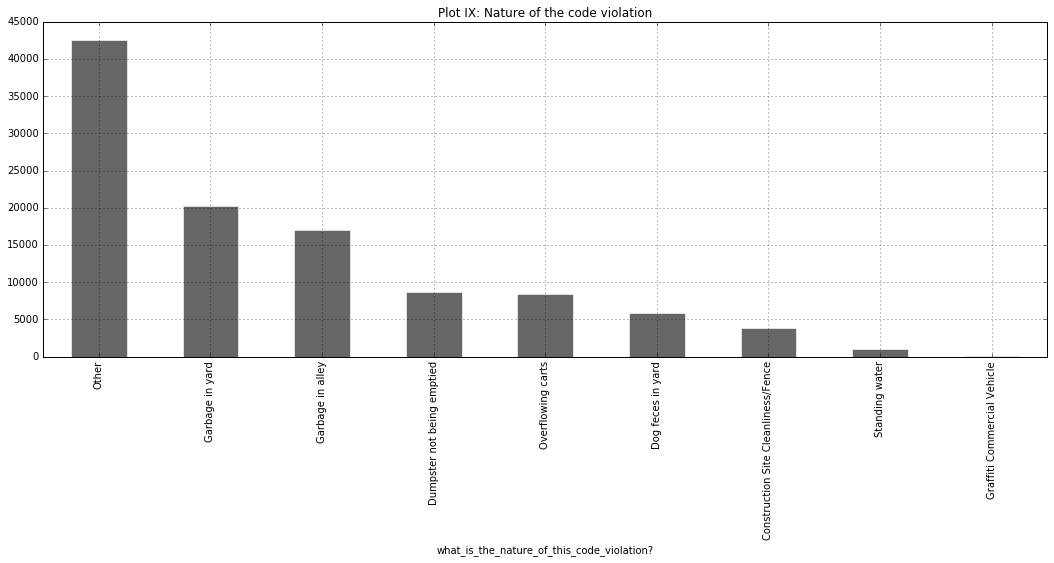

In [168]:
bar_plot(df=df_sanitation, var_name='what_is_the_nature_of_this_code_violation?', color='black', alpha=0.6,
         title='Plot IX: Nature of the code violation', edgecolor='white', figsize=(18, 6))

# Connecting the data

In [170]:
df = pd.read_csv('Food_Inspections.csv')
rest = df[df["Facility Type"] == "Restaurant"]


In [171]:
#let's cleanup these...
rest.loc[rest["Inspection Type"] == "TWO PEOPLE ATE AND GOT SICK.", "Inspection Type"] = "Suspected Food Poisoning"
rest.loc[rest["Inspection Type"] == "TASK FORCE LIQUOR (1481)","Inspection Type"] = "Task Force Liquor"
rest.loc[rest["Inspection Type"] == "Task Force Liquor 1475","Inspection Type"] = "Task Force Liquor"
rest.loc[rest["Inspection Type"] == "Package Liquor 1474","Inspection Type"] = "Task Force Liquor"
rest.loc[rest["Inspection Type"] == "1315 license reinspection","Inspection Type"] = "License Re-Inspection"
rest.loc[rest["Inspection Type"] == "Out of Business","Inspection Type"] = "OUT OF BUSINESS"
rest.loc[rest["Inspection Type"] == "No entry","Inspection Type"] = "NO ENTRY"
rest.loc[rest["Inspection Type"] == "No Entry","Inspection Type"] = "NO ENTRY"
rest.loc[rest["Inspection Type"] == "LICENSE TASK FORCE / NOT -FOR-PROFIT CLU","Inspection Type"] = "LICENSE TASK FORCE / NOT -FOR-PROFIT CLUB"

In [172]:
rest = rest[(rest["Results"] == "Pass") | (rest["Results"] == "Pass w/ Conditions") | (rest["Results"] == "Fail")]


In [173]:
#we'll remove superfluous columns
rest = rest.drop('Location', 1)
rest = rest.drop('State', 1)
rest = rest.drop('City', 1)
rest.shape

(78897, 13)

In [174]:
#let's recode the pass/fail
rest.loc[rest.Results != 'Fail', 'Y'] = 0
rest.loc[rest.Results == 'Fail', 'Y'] = 1

In [175]:
# Transform column headers to lower case
rest.columns = map(str.lower, rest.columns)

# Replace whitespace in headers
rest.columns = [x.strip().replace(' ', '_') for x in rest.columns]

In [176]:
rest.head()

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,zip,inspection_date,inspection_type,results,latitude,longitude,y
1,1970772,STARBUCKS COFFEE #2827,STARBUCKS COFFEE #2827,2093906.0,Restaurant,Risk 2 (Medium),1174 E 55TH ST,60615.0,11/3/16,Canvass,Pass,41.795175,-87.596601,0.0
3,1955335,CHIPOTLE MEXICAN GRILL#2768,CHIPOTLE,2476569.0,Restaurant,Risk 1 (High),806 W 63RD ST,60621.0,11/2/16,License Re-Inspection,Pass,41.779856,-87.645142,0.0
4,1955334,CHIPOTLE MEXICAN GRILL#2768,CHIPOTLE,2476568.0,Restaurant,Risk 1 (High),806 W 63RD ST,60621.0,11/2/16,License Re-Inspection,Pass,41.779856,-87.645142,0.0
5,1970747,SUBWAY #4267,SUBWAY,2354431.0,Restaurant,Risk 1 (High),115 E 51ST ST,60615.0,11/2/16,Canvass,Pass w/ Conditions,41.801902,-87.621926,0.0
6,1970728,SANTULLO'S EATERY,SANTULLO'S EATERY,1767714.0,Restaurant,Risk 1 (High),1943-1945 W NORTH AVE,60622.0,11/2/16,Complaint,Fail,41.910387,-87.676831,1.0


In [195]:
# Reformate licence id
rest['license_#'] = rest['license_#'].astype(int)
rest['license_id'] = rest['license_#']

In [196]:
# Left join
df_merge = pd.merge(df_business, rest.loc[:, ['license_id', 'y']], how='left', on=['license_id', 'license_id'])

In [198]:
df_merge.columns

Index([u'﻿id', u'license_id', u'account_number', u'site_number', u'legal_name',
       u'doing_business_as_name', u'address', u'city', u'state', u'zip_code',
       u'ward', u'precinct', u'ward_precinct', u'police_district',
       u'license_code', u'license_description', u'business_activity_id',
       u'business_activity', u'license_number', u'application_type',
       u'application_created_date', u'application_requirements_complete',
       u'payment_date', u'conditional_approval', u'license_term_start_date',
       u'license_term_expiration_date', u'license_approved_for_issuance',
       u'date_issued', u'license_status', u'license_status_change_date',
       u'ssa', u'latitude', u'longitude', u'location', u'y'],
      dtype='object')

In [201]:
df_merge['inspection'] = 0
df_merge.loc[((df_merge['y'] == 1) | (df_merge['y'] == 0)), 'inspection'] = 1

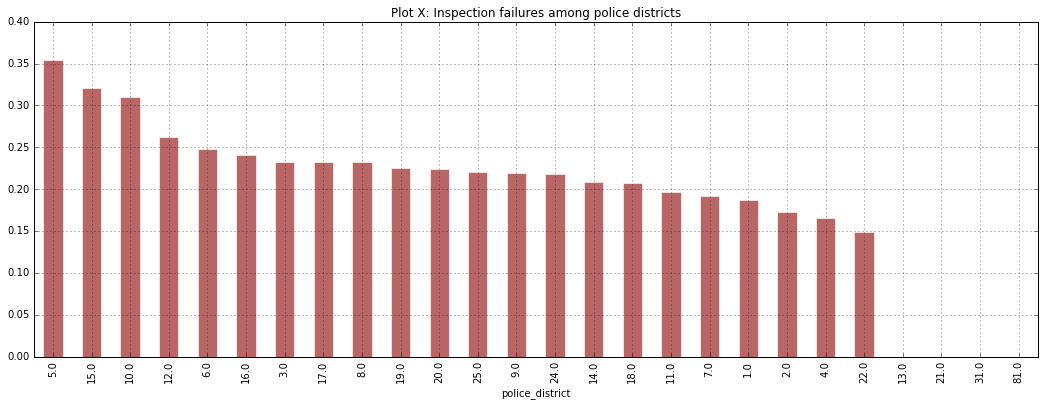

In [202]:
# Group by
df_merge['count'] = 1
group = df_merge.groupby('police_district')
group = group.sum()
group['prop'] = group['y'] / group['inspection']
group = group.sort_values('prop', ascending=False)
group = group['prop']

# Plot
plt = group.plot(kind='bar', color='darkred', alpha=0.6, edgecolor='white', title='Plot X: Inspection failures among police districts', figsize=(18, 6))
plt.grid()



It appears that the highest failure rate is in district 5. 